In [20]:
#'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

#'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

#'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as py
init_notebook_mode(connected=True)

#'''Spatial Visualizations'''
import folium
import folium.plugins

#'''NLP - WordCloud'''
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import os
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['trace', 'plot']
`%matplotlib` prevents importing * from pylab and numpy



In [2]:
df = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,2018-07-31,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [6]:
def get_month(x):
    return x.month
def get_weekday(x):
    return x.weekday()

In [7]:
df['month'] = df['date'].apply(get_month)

In [8]:
df['weekday'] = df['date'].apply(get_weekday)

In [9]:
df.head()

,rating,date,variation,verified_reviews,feedback,month,weekday
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,7,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,7,1
2,4,2018-07-31,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,7,1
3,5,2018-07-31,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,7,1
4,5,2018-07-31,Charcoal Fabric,Music,1,7,1


In [10]:
labels = sorted(df.rating.unique())
values = df.rating.value_counts().sort_index()
colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

trace = go.Pie(labels=labels, values=values,title='Distribution of rating',marker = dict(colors = colors))


iplot([trace])


### Observation:
    By looking at the above pie chart, we can infer that most of the Ratings are good for alexa. Around 72.6% people have given Alexa 5 Star rating, which is very good. 14.4% people have given Alexa a 4 Star Rating, which is also good. that means 72.6+14.4 = 87% people have given alexa good rating.

    4.38% people have given alexa an average rating of 3 stars. 3.05% people did not like alexa and chose to give only 2 star ratings to alexa whereas 5.11% people hated alexa and decided to give alexa only 1 Star Rating. This a total of 3.05+5.11 = 8.16% people did not like alexa.

In [11]:
trace = go.Histogram(x=df.variation,marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of different variation',
    xaxis=dict(
        title='Variations'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


### Observation:
    The above Bar plot, plots the different Variatios of Amazon Alexa with their popularity or no. of counts. It is quite clear that Black Dot is the most popular variation of Amazon Alexa with more than 500 units out of 3150 samples, which is really good.

    Charcoal Fabric and Configuration: Fire TV Stick are also good and very much popular after Black dot. Whereas Oak Fish and Walnut Finish are very Unpopular with less than 10 entries.

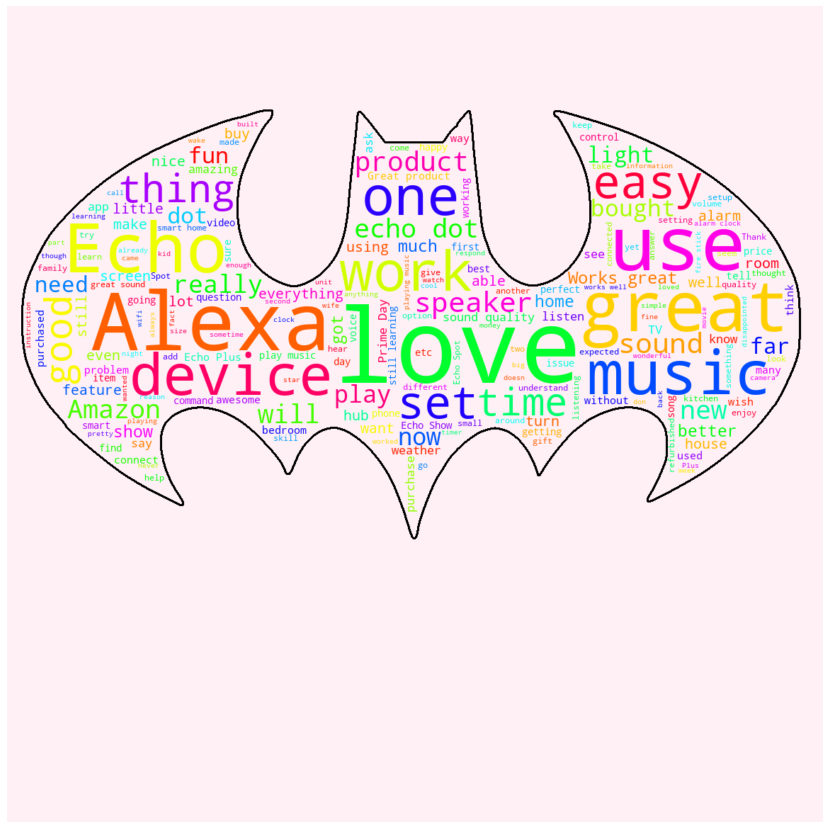

In [12]:
wave_mask= np.array(Image.open("batman.png"))
stopwords = set(STOPWORDS)
stopwords.update(["II", "III"])
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(mask=wave_mask,background_color="lavenderblush",colormap="hsv" ,contour_width=2, contour_color="black",
                      width=950,stopwords=stopwords,
                          height=950
                         ).generate(" ".join(df.verified_reviews))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [13]:
df.head()

,rating,date,variation,verified_reviews,feedback,month,weekday
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,7,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,7,1
2,4,2018-07-31,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,7,1
3,5,2018-07-31,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,7,1
4,5,2018-07-31,Charcoal Fabric,Music,1,7,1


In [14]:
xfeedback1 = df[df['feedback'] == 1]
xfeedback2 = df[df['feedback'] == 0]

In [15]:
trace1 = go.Histogram(
    x=xfeedback1['variation'],
    opacity=0.75,
    name = "feedback",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xfeedback2['variation'],
    opacity=0.75,
    name = "no_feedback",
    marker=dict(color='rgb(215,48,39)'))

data = [trace1, trace2]

layout = go.Layout(barmode='stack',
                   title='Counts of different Variation',
                   xaxis=dict(title='Variations'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Observation:
    The above Bar plot, plots the different Variatios of Amazon Alexa with their popularity or no. of counts. It is quite clear that Black Dot is the most popular variation of Amazon Alexa with more than 500 units out of 3150 samples, which is really good.
    Charcoal Fabric and Configuration: Fire TV Stick are also good and very much popular after Black dot. Whereas Oak Fish and Walnut Finish are very Unpopular with less than 10 entries.
    
    We could also see that around 92% people gave a positive feedback to Amazon Alexa and only 8% people gave negative feedback to Amazon Alexa. This Suggests that Amazon Alexa is a popular product amongst so many people and only few people did not like it for some unforeseeable factors.
    

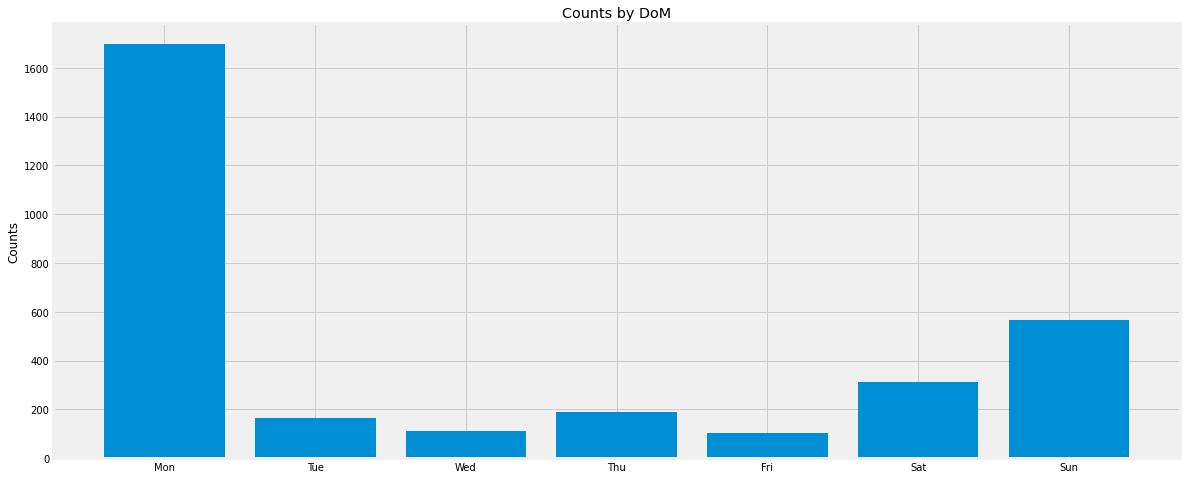

In [21]:
plt.rcParams['figure.figsize'] = (18,8)
hist(df.weekday, bins = 7, range = (-.5,6.5),rwidth=.8)
plt.xticks(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split());

plt.ylabel('Counts')
plt.title('Counts by DoM')
plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

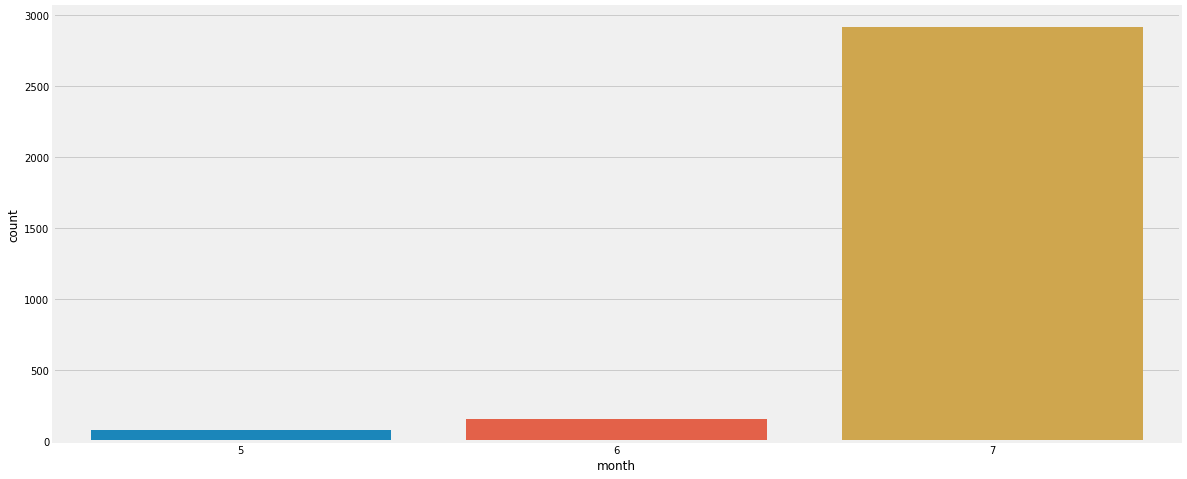

In [26]:
sns.countplot(x = 'month', data = df)

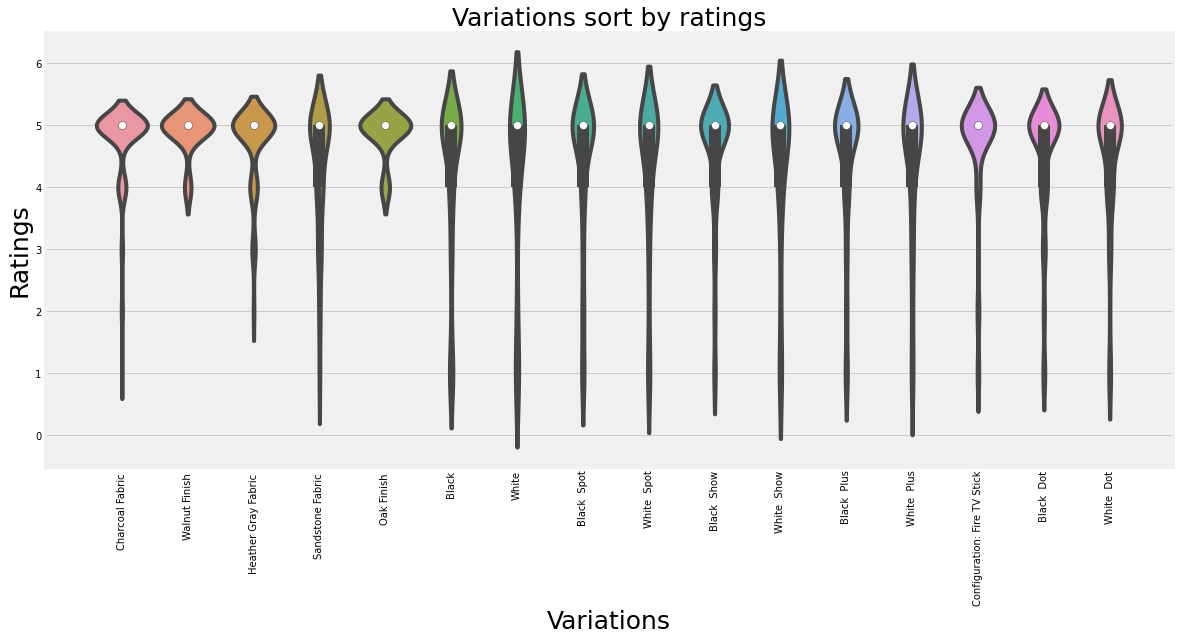

In [24]:
sns.violinplot(df.variation,df.rating).plot(kind="bar",figsize=(20,6),fontsize = 15)
plt.title('Variations sort by ratings', fontsize = 25)
plt.xlabel('Variations',fontsize = 25)
plt.ylabel('Ratings',fontsize = 25)
plt.xticks(rotation = 90)

#plt.savefig('heartDiseaseAndAges.png')
plt.show()

### The above Bivariate plot, which plots Variation and ratings to check which of the Variation of Amazon Alexa has been perfoeming best in terms of ratings.

    Walnut finish and Oak Finish have very high ratings, the ratings rangee from 4.5 to 5 which is really impressive, These variation are rare and have high reviews.

    White and Black Variations for Amazon Alexa have low ratings also, as it is the most common variation available for the product that is the reason, why it has ratings varying from 0 to 5.